# Conjunto de dados de indicadores de saúde do diabetes

É um conjunto de dados limpo de 70.692 respostas de pesquisa ao BRFSS2015 do CDC. Tem uma divisão igual de 50-50 de entrevistados sem diabetes e com pré-diabetes ou diabetes. A variável alvo Diabetes_binary tem 2 classes. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('diabetes_data1.csv')
df.rename(columns = {'Age':'Idade', 'Sex':'Sexo', 'HighChol':'Nivel_Coles', 'CholCheck':'Check_coles', 'BMI':'IMC','Smoker':'Fumar_dias','HeartDiseaseorAttack':'Infarto','PhysActivity':'Atividade_física','Fruits':'Frutas','Veggies':'Vegetais','HvyAlcoholConsump':'Consumo_alccol','GenHlth':'Class_saude','MentHlth':'Saude_mental','PhysHlth':'Pratica_ativ_dias','DiffWalk':'Dificuldade_andar','Stroke':'Fumante','HighBP':'Pressão alta','Diabetes':'Diabetes'}, inplace = True)

In [3]:
df.head(20)

,Idade,Sexo,Nivel_Coles,Check_coles,IMC,Fumar_dias,Infarto,Atividade_física,Frutas,Vegetais,Consumo_alccol,Class_saude,Saude_mental,Pratica_ativ_dias,Dificuldade_andar,Fumante,Pressão alta,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


# Explorando dos dados 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idade              70692 non-null  float64
 1   Sexo               70692 non-null  float64
 2   Nivel_Coles        70692 non-null  float64
 3   Check_coles        70692 non-null  float64
 4   IMC                70692 non-null  float64
 5   Fumar_dias         70692 non-null  float64
 6   Infarto            70692 non-null  float64
 7   Atividade_física   70692 non-null  float64
 8   Frutas             70692 non-null  float64
 9   Vegetais           70692 non-null  float64
 10  Consumo_alccol     70692 non-null  float64
 11  Class_saude        70692 non-null  float64
 12  Saude_mental       70692 non-null  float64
 13  Pratica_ativ_dias  70692 non-null  float64
 14  Dificuldade_andar  70692 non-null  float64
 15  Fumante            70692 non-null  float64
 16  Pressão alta       706

In [5]:
df.value_counts('Diabetes')

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64

0 é identificado como nenhum caso de diabetes,  
1 é identificado para pré-diabetes ou diabetes.

# Amostragem  dos dados graficamente

Este conjunto de dados é balanceado.

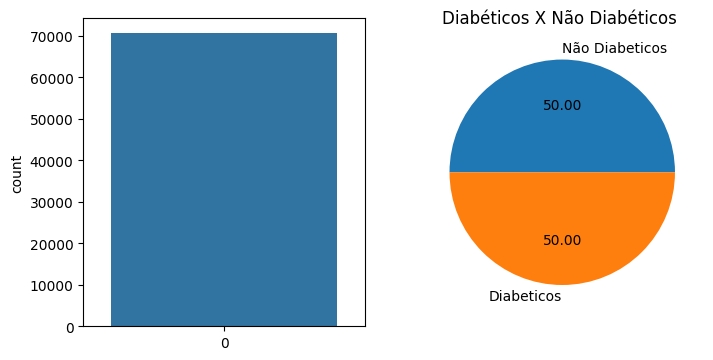

In [6]:
figure1, plot1 = plt.subplots(1,2,figsize=(8,4))

sns.countplot(df['Diabetes'],ax=plot1[0])

plt.title(f'Diabéticos X Não Diabéticos ')

labels=["Não Diabeticos","Diabeticos"]

plt.pie(df["Diabetes"].value_counts() , labels =labels ,autopct='%.02f' );

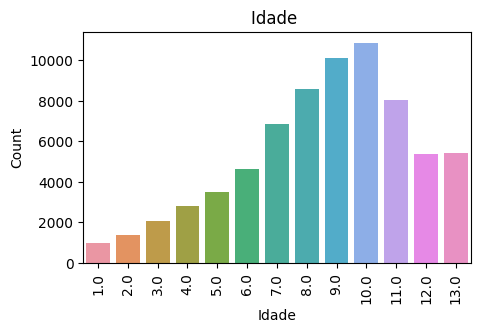

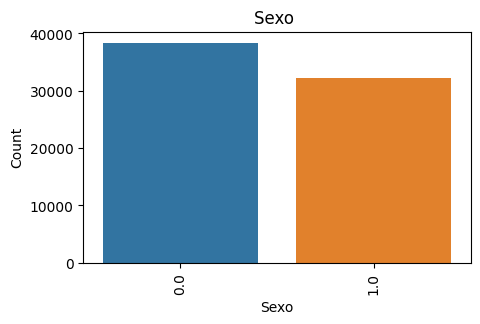

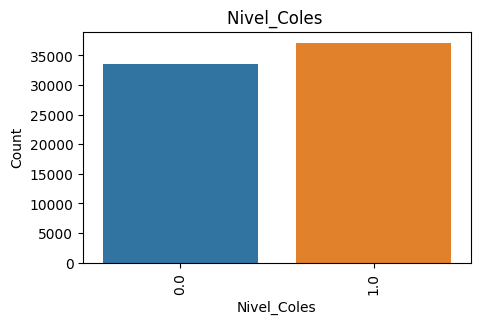

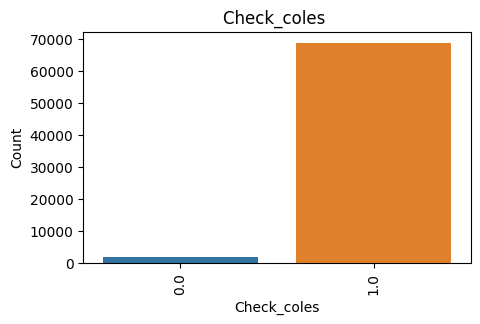

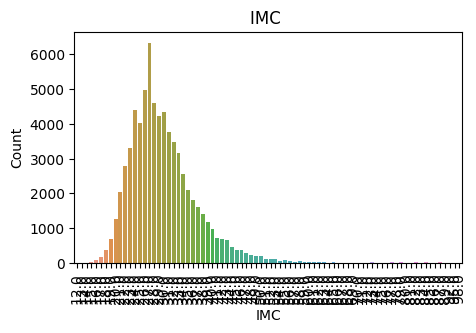

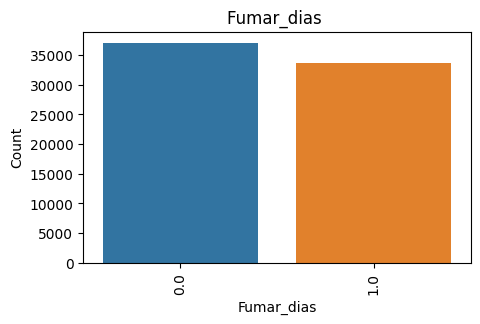

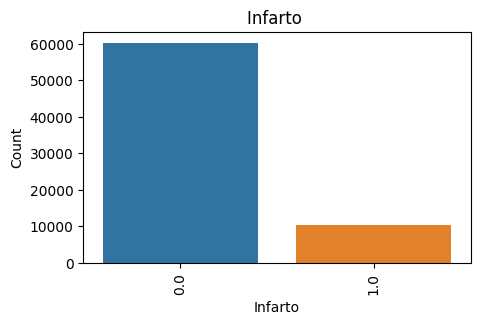

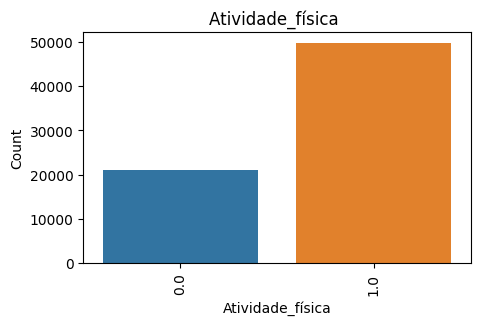

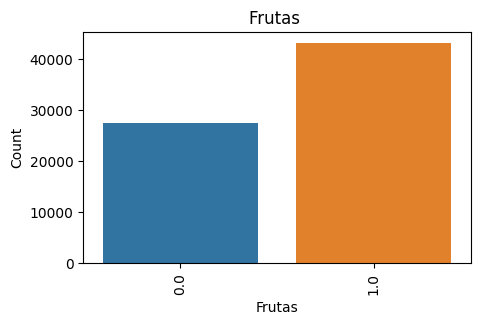

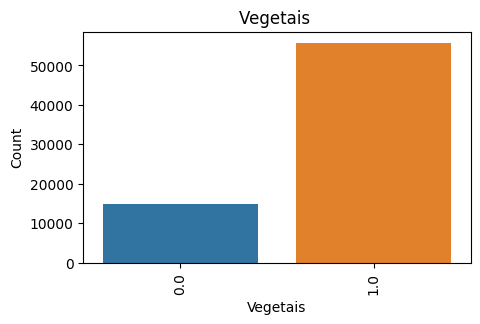

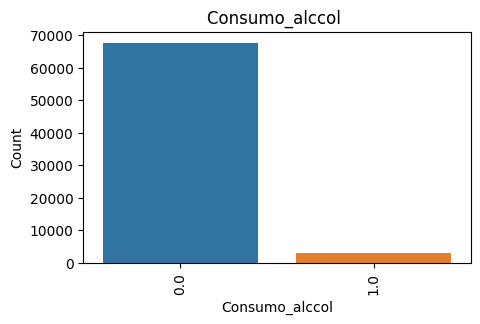

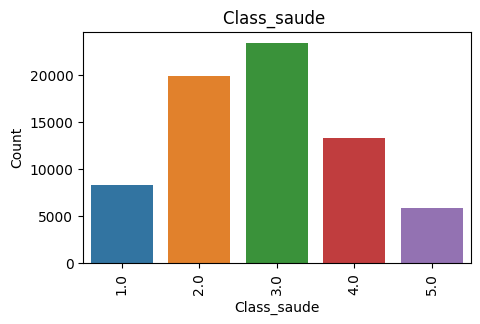

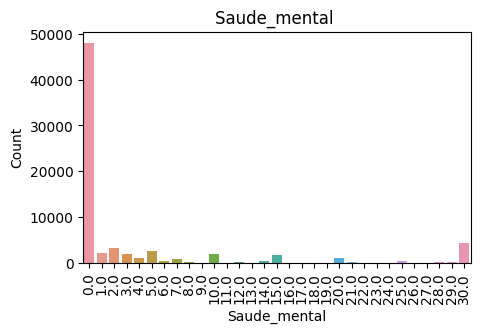

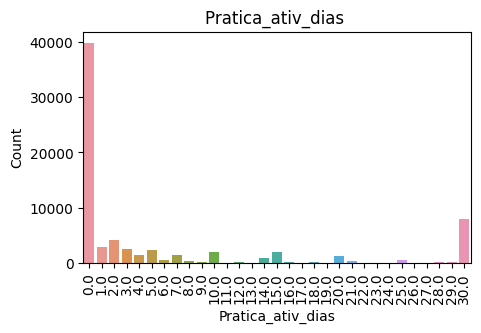

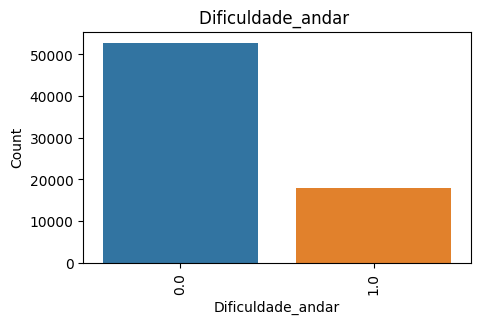

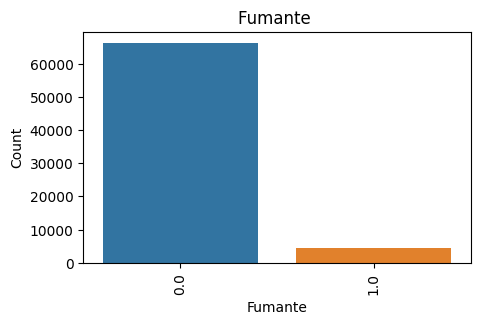

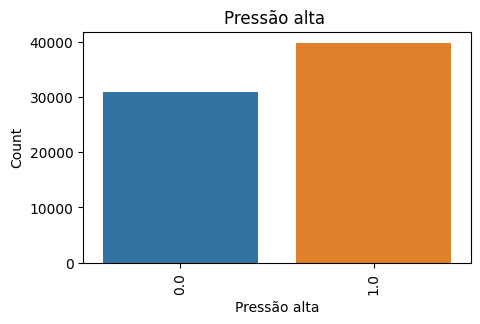

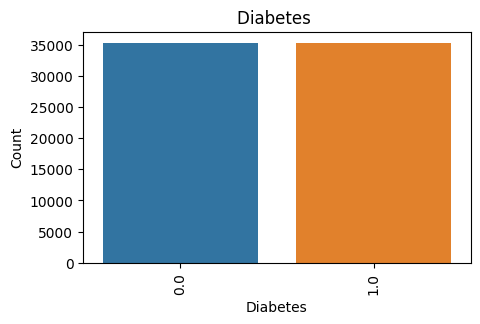

In [7]:
for column in df.columns:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
    plt.title(f'{column} ')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()



# Verificação de dados missing ou nulos 

In [8]:
df.isnull().sum()

Idade                0
Sexo                 0
Nivel_Coles          0
Check_coles          0
IMC                  0
Fumar_dias           0
Infarto              0
Atividade_física     0
Frutas               0
Vegetais             0
Consumo_alccol       0
Class_saude          0
Saude_mental         0
Pratica_ativ_dias    0
Dificuldade_andar    0
Fumante              0
Pressão alta         0
Diabetes             0
dtype: int64

# Verificação de outros dados 

Quantidade de registro e colunas.



Sexo = 0 mulheres e 1 homens 

In [9]:
df.shape

(70692, 18)

In [10]:
df.describe()

,Idade,Sexo,Nivel_Coles,Check_coles,IMC,Fumar_dias,Infarto,Atividade_física,Frutas,Vegetais,Consumo_alccol,Class_saude,Saude_mental,Pratica_ativ_dias,Dificuldade_andar,Fumante,Pressão alta,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


# Analisando as idades 

Idade minima e máxima = 1= 18-24 
                        9 = 60-64
                        13 = 80 ou mais

# Verificando se tem valores minimos igual a 0

In [11]:
df['Idade'].describe().round(0)

count    70692.0
mean         9.0
std          3.0
min          1.0
25%          7.0
50%          9.0
75%         11.0
max         13.0
Name: Idade, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

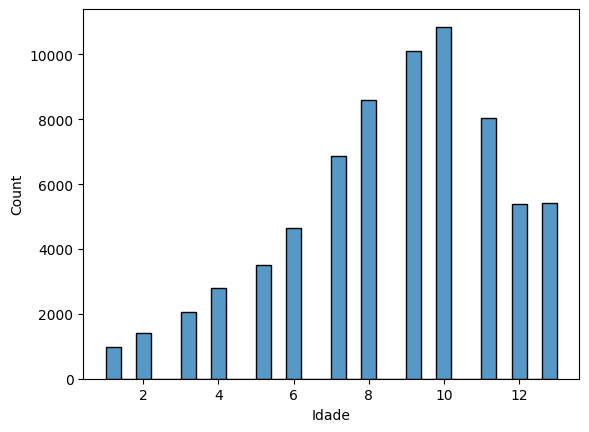

In [12]:
sns.histplot(x='Idade',data=df, bins=30)
plt.show



# Podemos obsrervar que tem mais mulheres do que homens 

In [13]:
df.value_counts('Sexo')

Sexo
0.0    38386
1.0    32306
Name: count, dtype: int64


# Analisando o nivel de colesterol 

Sendo 0 = Colesterol baixo
      1 = Colesterol Alto 


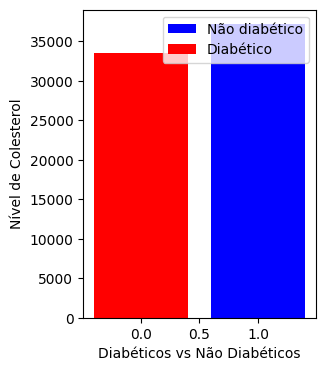

In [14]:
value_counts = df['Nivel_Coles'].value_counts()

plt.figure(figsize=(3, 4))
bars = plt.bar(value_counts.index, value_counts.values, color=['blue', 'red'])

plt.legend(bars, ['Não diabético', 'Diabético'])

plt.xlabel('Diabéticos vs Não Diabéticos')
plt.ylabel('Nível de Colesterol')

plt.show()


In [15]:
df_correlation = df.corr()

print('Matriz de correlação: ')
display(df_correlation)

Matriz de correlação: 


,Idade,Sexo,Nivel_Coles,Check_coles,IMC,Fumar_dias,Infarto,Atividade_física,Frutas,Vegetais,Consumo_alccol,Class_saude,Saude_mental,Pratica_ativ_dias,Dificuldade_andar,Fumante,Pressão alta,Diabetes
Idade,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sexo,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
Nivel_Coles,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
Check_coles,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
IMC,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Fumar_dias,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
Infarto,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
Atividade_física,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Frutas,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Vegetais,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


<function matplotlib.pyplot.show(close=None, block=None)>

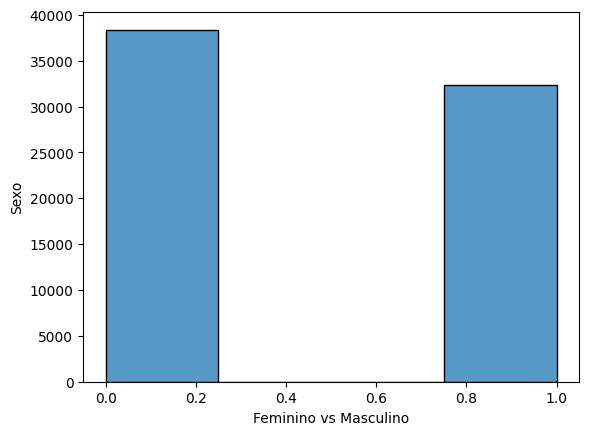

In [16]:
sns.histplot(x='Sexo',data=df, bins=4)

plt.xlabel('Feminino vs Masculino')
plt.ylabel('Sexo')
plt.show

#  Analisando  a coluna IMC 

POdemos observar atraves do graficos que o IMC é mas alto em pessoas que não são diabeticas. 

<Figure size 1200x500 with 0 Axes>

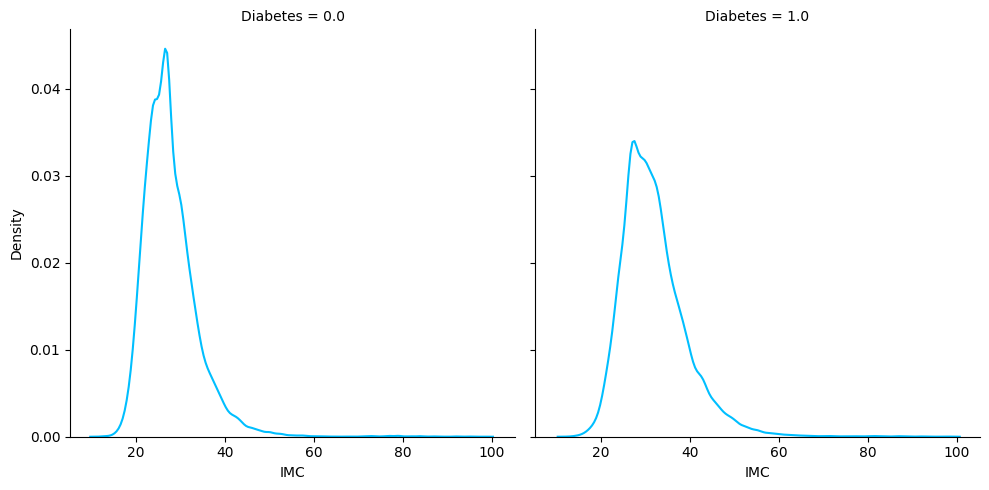

In [17]:
plt.figure(figsize=(12,5))
sns.displot(x='IMC', col='Diabetes' , data = df, kind="kde" ,color = 'deepskyblue')

# Verificando a correlação das colunas com a coluna diabetes 

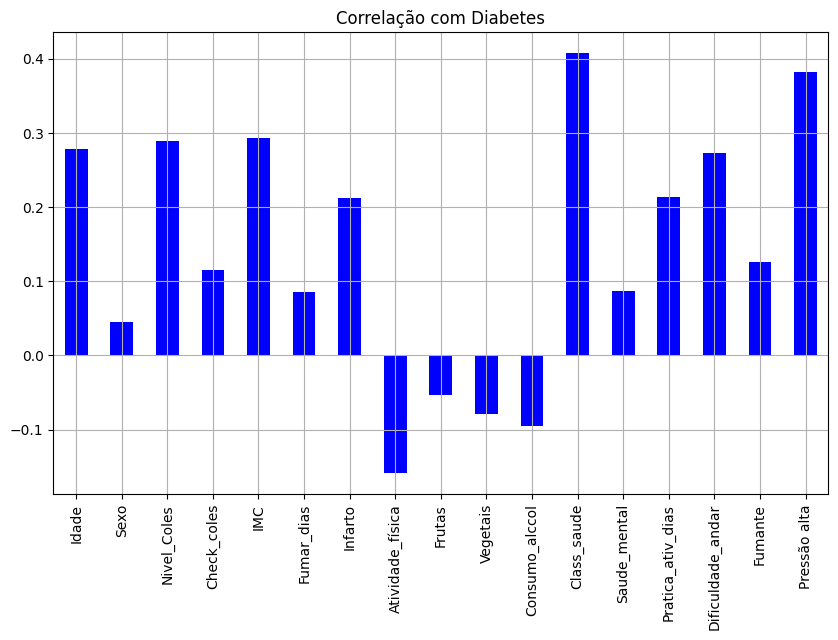

In [18]:
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6),
                                                       title="Correlação com Diabetes",color='Blue');

# Separação dos dados de teste e treino 

1 parte de separação dos dados 

In [19]:
X = df.loc[:, df.columns != 'Fumante'] 
y= (df['Diabetes']).astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)



In [20]:
df.head()

,Idade,Sexo,Nivel_Coles,Check_coles,IMC,Fumar_dias,Infarto,Atividade_física,Frutas,Vegetais,Consumo_alccol,Class_saude,Saude_mental,Pratica_ativ_dias,Dificuldade_andar,Fumante,Pressão alta,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelo KNN 

In [21]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['distance', 'uniform']}
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)

gridKNN.fit(X_train, y_train)

best_estimator = gridKNN.best_estimator_

y_train_pred = best_estimator.predict(X_train)

cm_train = confusion_matrix(y_train, y_train_pred)


y_test_pred = best_estimator.predict(X_test)

cm_test = confusion_matrix(y_test, y_test_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.866 total time=   0.7s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.857 total time=   0.4s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.862 total time=   0.3s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.863 total time=   0.3s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.864 total time=   0.3s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.866 total time=   0.5s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.857 total time=   0.7s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.862 total time=   0.5s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.863 total time=   0.5s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.864 total time=   0.5s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.892 total time=   0.3s
[CV 2/5] END ...n_neighbors=3, weights=distance;

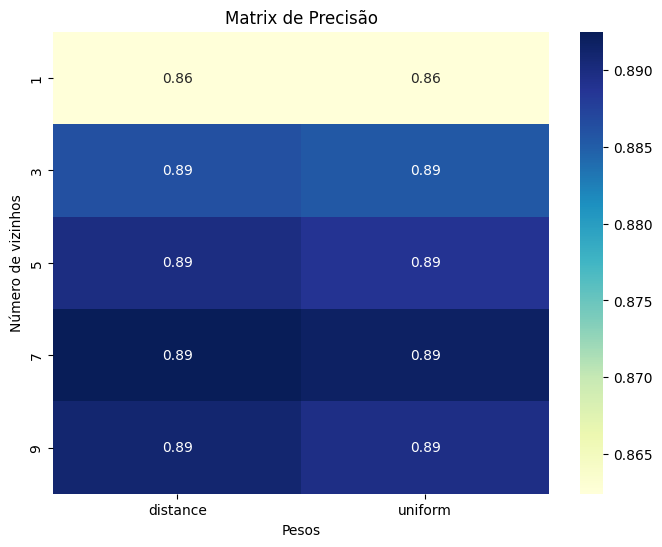

In [22]:
mean_scores = gridKNN.cv_results_['mean_test_score']

n_neighbors = len(param_grid['n_neighbors'])
n_weights = len(param_grid['weights'])
mean_score_matrix = np.reshape(mean_scores, (n_neighbors, n_weights))

df_mean_score = pd.DataFrame(mean_score_matrix,
                             index=param_grid['n_neighbors'],
                             columns=param_grid['weights'])

plt.figure(figsize=(8, 6))
sns.heatmap(df_mean_score, annot=True, cmap='YlGnBu')
plt.title('Matrix de Precisão')
plt.xlabel('Pesos')
plt.ylabel('Número de vizinhos')
plt.show()

In [23]:
y_pred_test = gridKNN.predict(X_test)
y_pred_train = gridKNN.predict(X_train)

print(f'Accuracy Treino - {accuracy_score(y_train, y_pred_train)}')
print(f'Accuracy Teste -  {accuracy_score(y_test, y_pred_test)}')

Accuracy Treino - 1.0
Accuracy Teste -  0.8963390482657161


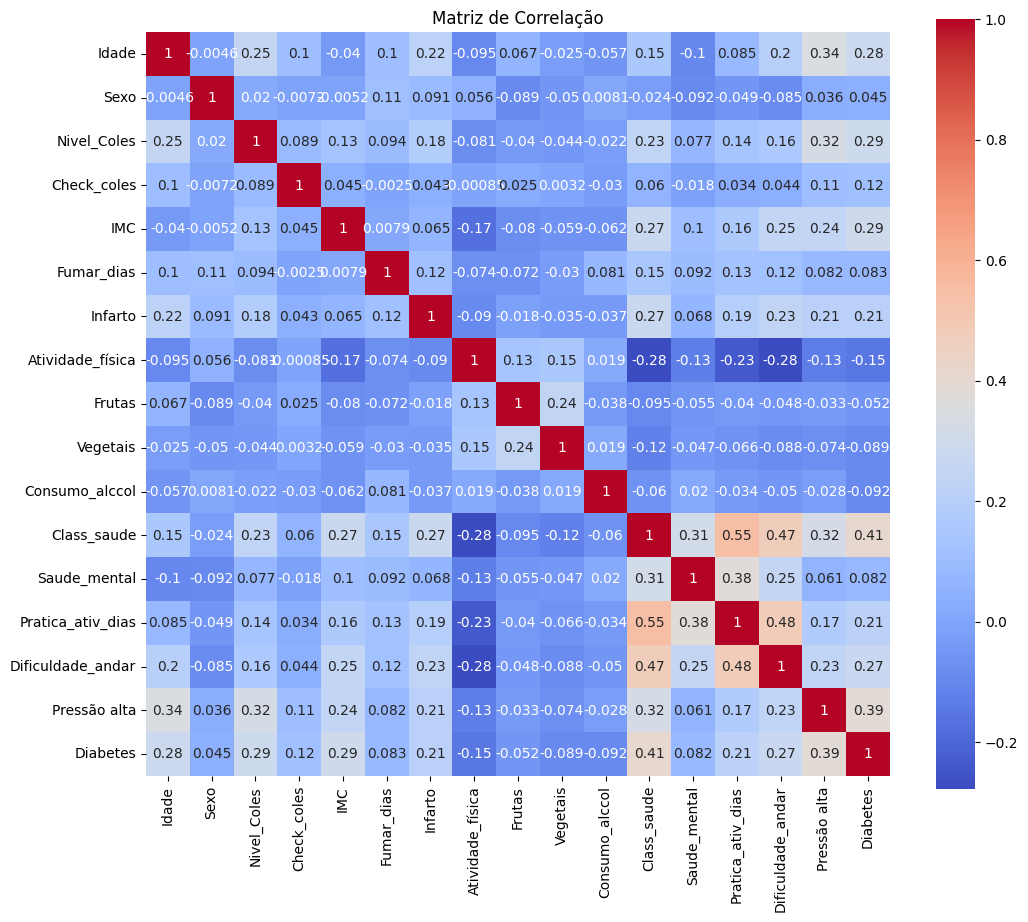

In [24]:
correlation_matrix = X_train.corr() 

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Matriz de Correlação')
plt.show()


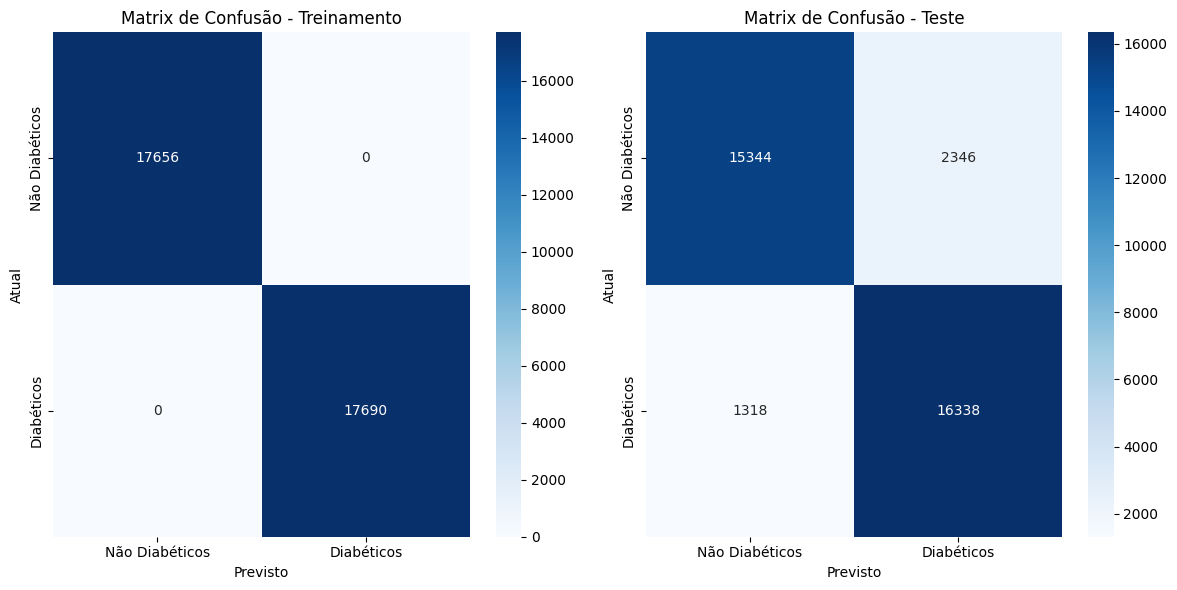

In [25]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Diabéticos', 'Diabéticos'], yticklabels=['Não Diabéticos', 'Diabéticos'])
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Treinamento')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Diabéticos', 'Diabéticos'], yticklabels=['Não Diabéticos', 'Diabéticos'])
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Teste')

plt.tight_layout()
plt.show()

# SVM 

In [26]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"SVM accuracy: {acc}")


SVM accuracy: 0.9993209981327449


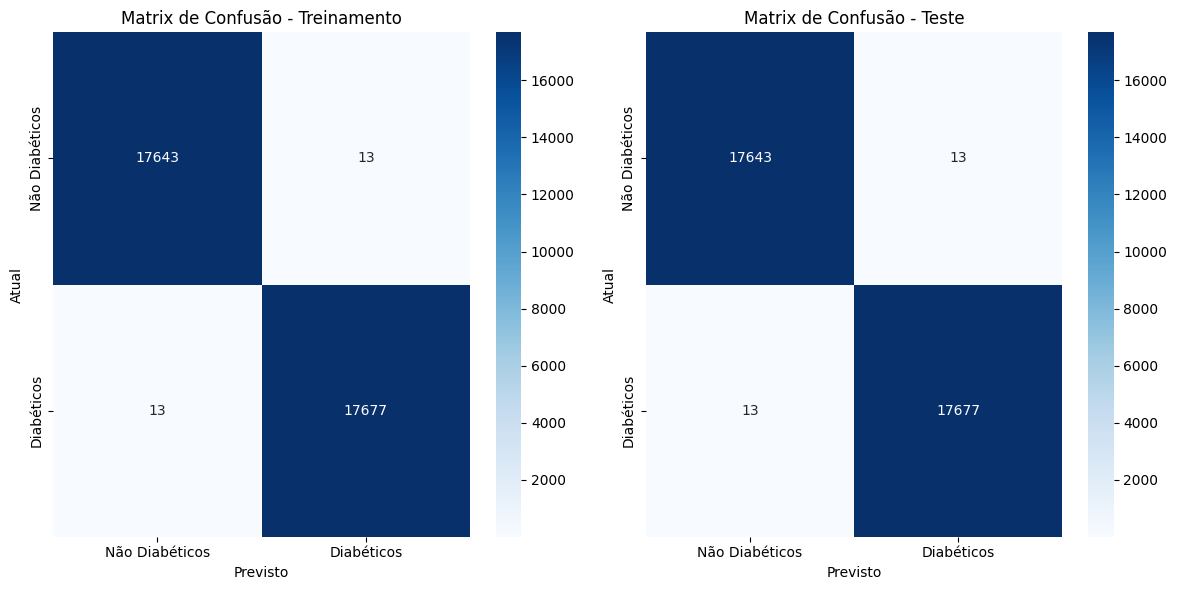

Accuracy - Training: 0.9992644146438069
Accuracy - Test: 0.9993209981327449


In [27]:
clf = SVC(kernel='rbf')

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Diabéticos', 'Diabéticos'], yticklabels=['Não Diabéticos', 'Diabéticos'])

plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Treinamento')

plt.subplot(1, 2, 2)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Diabéticos', 'Diabéticos'], yticklabels=['Não Diabéticos', 'Diabéticos'])
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Teste')

plt.tight_layout()
plt.show()

print("Accuracy - Training:", accuracy_train)
print("Accuracy - Test:", accuracy_test)


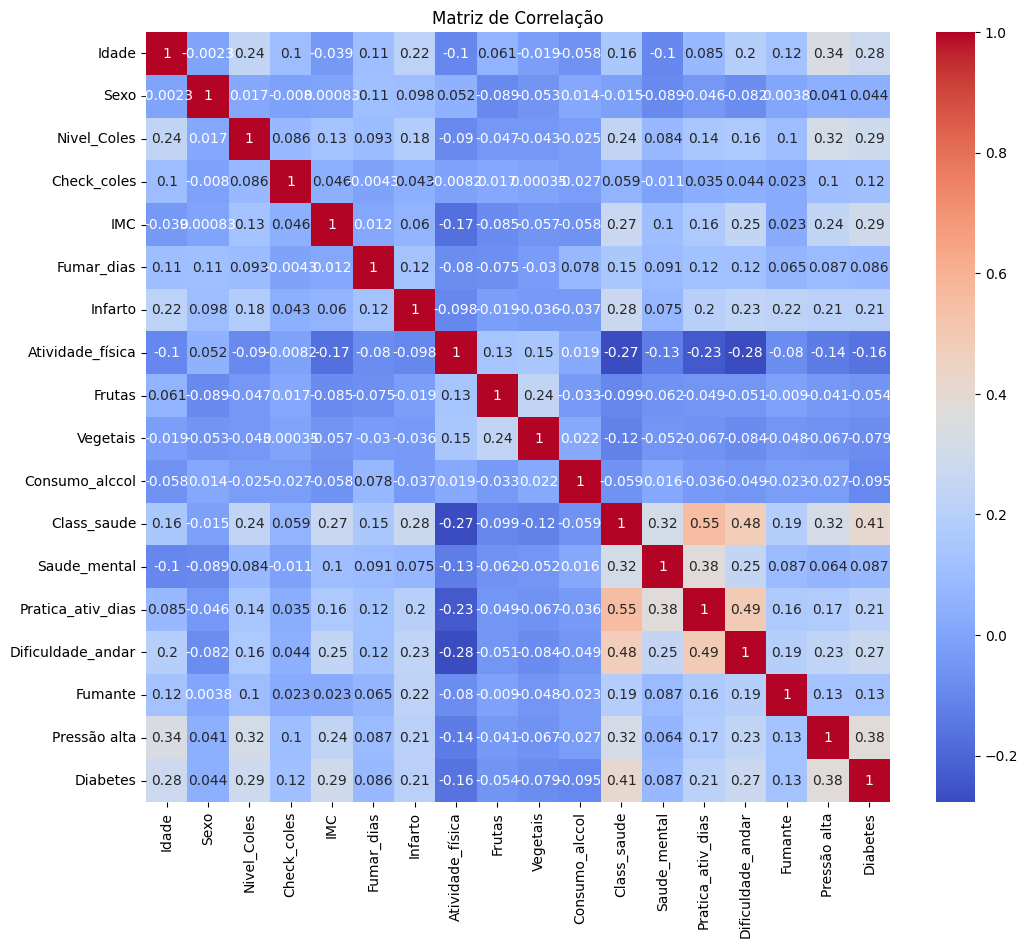

In [50]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


In [28]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"SVM accuracy: {acc}")

SVM accuracy: 1.0


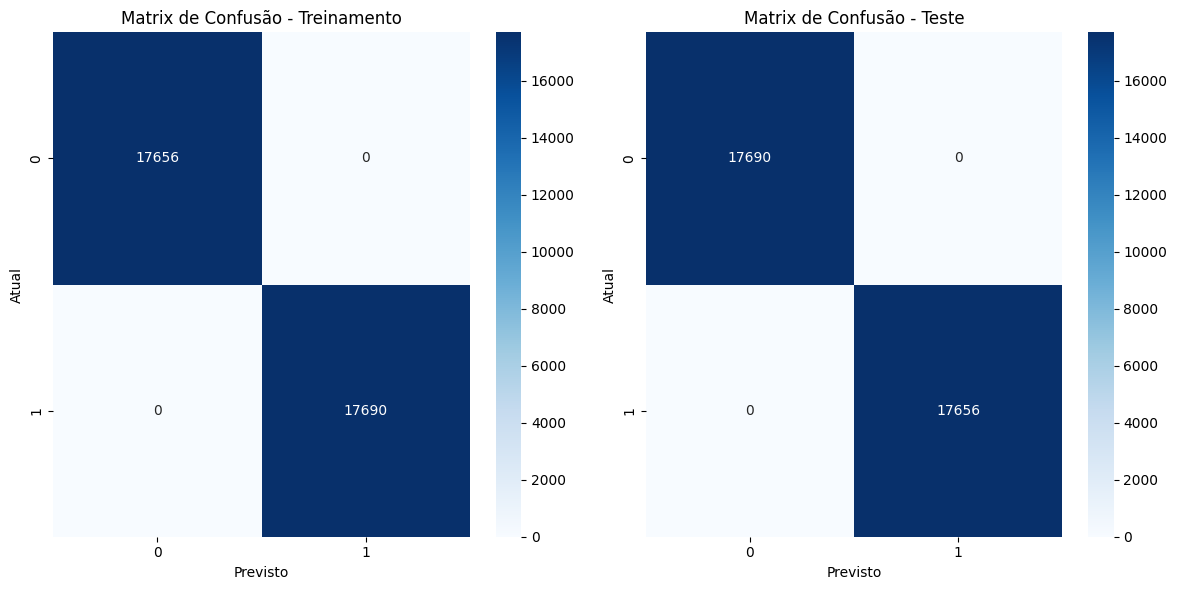

Accuracy - Training: 1.0
Accuracy - Test: 1.0


In [29]:
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Treinamento')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Teste')

plt.tight_layout()
plt.show()

print("Accuracy - Training:", accuracy_train)
print("Accuracy - Test:", accuracy_test)

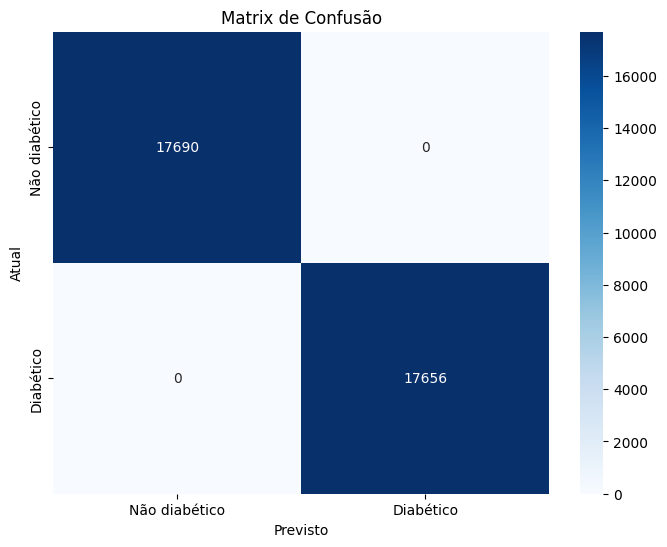

In [53]:
class_labels = ['Não diabético', 'Diabético']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão')
plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)
plt.show()

SVM accuracy: 0.9993209981327449


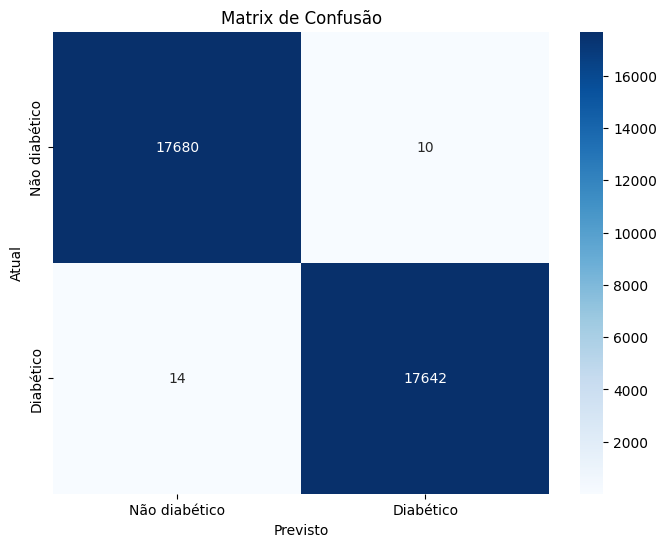

In [30]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

class_labels = ['Não diabético', 'Diabético']

print(f"SVM accuracy: {acc}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão')
plt.xticks(ticks=[0.5, 1.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5], labels=class_labels)
plt.show()


# Naive Bayes

In [31]:
X = df.loc[:, df.columns != 'Fumante'] .to_numpy()
y= (df['Diabetes'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [32]:
gauss = GaussianNB()
kf = StratifiedKFold()

In [33]:
for fold, (train, test) in enumerate(kf.split(X, y)): 
    gauss.fit(X[train], y[train])    
    y_pred = gauss.predict(X[test])

In [34]:
    accuray = accuracy_score(y_pred, y[test])
    print("Accuracy:", accuray)
    f1 = f1_score(y_pred, y[test])
    print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


In [35]:
models = {
    "Bernoulli" : (BernoulliNB(), { }),
    "Complement" : (ComplementNB(), { }),
    "Gauss": (GaussianNB(), { }), 
    "Multinomial" : (MultinomialNB(), { })
}  

In [36]:
df_score = pd.DataFrame(columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score'])

for model, (clf, parameters) in models.items():
    for fold, (train, test) in enumerate(kf.split(X, y)):
        best = GridSearchCV(clf, parameters, cv=kf, scoring="f1", return_train_score=True)
        best.fit(X[train], y[train])
        pred = best.predict(X[test])

        report = classification_report(y[test], pred, target_names=['Good', 'Bad'])
        print(f'{model} - {fold} \n {report}')

        _acc = accuracy_score(y[test], pred)
        _f1 = f1_score(y[test], pred)
        _recall = recall_score(y[test], pred)
        _precision = precision_score(y[test], pred)

        row = {'Model': model, 'accuracy': _acc, 'precision': _precision, 'recall': _recall, 'f1-score': _f1}
        df_score = pd.concat([df_score, pd.DataFrame([row])], ignore_index=True)


Bernoulli - 0 
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7070
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14139
   macro avg       1.00      1.00      1.00     14139
weighted avg       1.00      1.00      1.00     14139

Bernoulli - 1 
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7070

    accuracy                           1.00     14139
   macro avg       1.00      1.00      1.00     14139
weighted avg       1.00      1.00      1.00     14139

Bernoulli - 2 
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14138
   macro avg       1.00      1.00      1.00     14138
weighted avg       1.00   

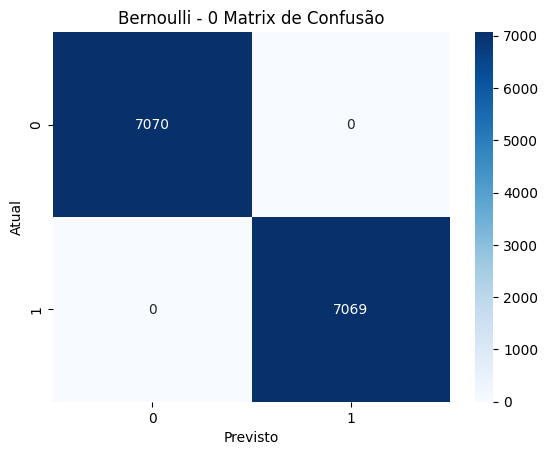

Bernoulli - 0 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7070
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14139
   macro avg       1.00      1.00      1.00     14139
weighted avg       1.00      1.00      1.00     14139



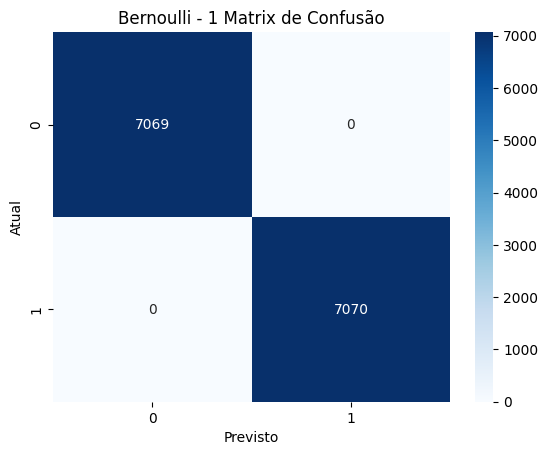

Bernoulli - 1 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7070

    accuracy                           1.00     14139
   macro avg       1.00      1.00      1.00     14139
weighted avg       1.00      1.00      1.00     14139



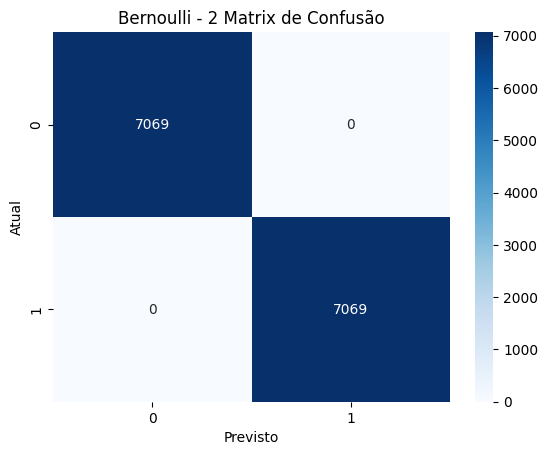

Bernoulli - 2 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14138
   macro avg       1.00      1.00      1.00     14138
weighted avg       1.00      1.00      1.00     14138



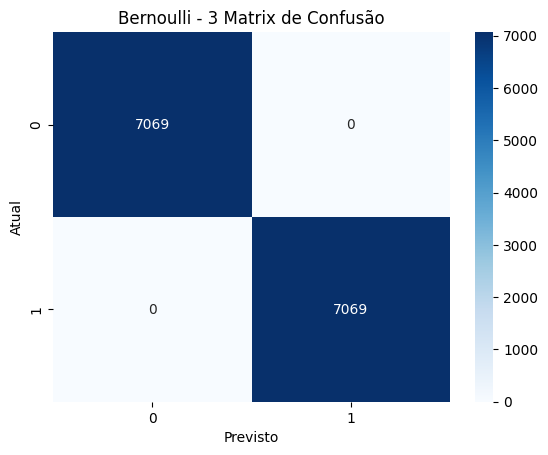

Bernoulli - 3 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14138
   macro avg       1.00      1.00      1.00     14138
weighted avg       1.00      1.00      1.00     14138



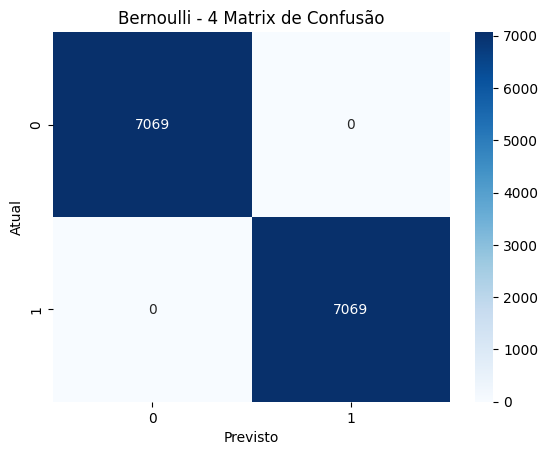

Bernoulli - 4 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14138
   macro avg       1.00      1.00      1.00     14138
weighted avg       1.00      1.00      1.00     14138



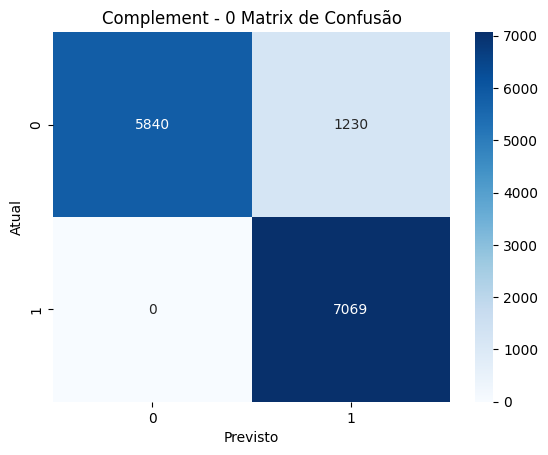

Complement - 0 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.83      0.90      7070
         Bad       0.85      1.00      0.92      7069

    accuracy                           0.91     14139
   macro avg       0.93      0.91      0.91     14139
weighted avg       0.93      0.91      0.91     14139



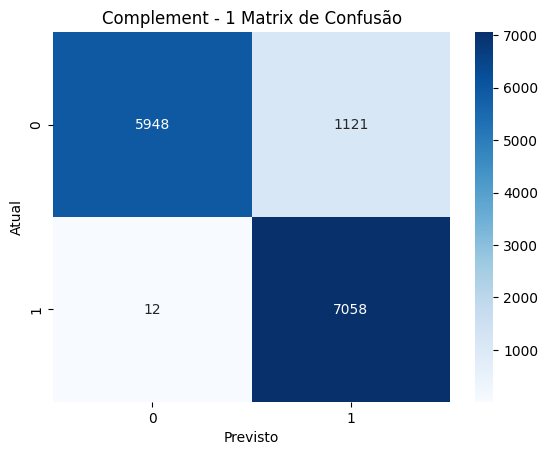

Complement - 1 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.84      0.91      7069
         Bad       0.86      1.00      0.93      7070

    accuracy                           0.92     14139
   macro avg       0.93      0.92      0.92     14139
weighted avg       0.93      0.92      0.92     14139



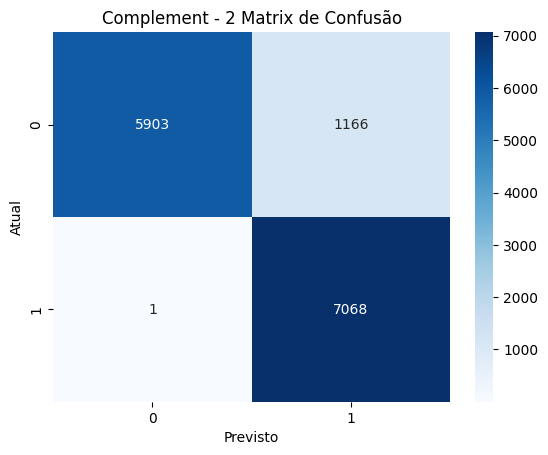

Complement - 2 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.84      0.91      7069
         Bad       0.86      1.00      0.92      7069

    accuracy                           0.92     14138
   macro avg       0.93      0.92      0.92     14138
weighted avg       0.93      0.92      0.92     14138



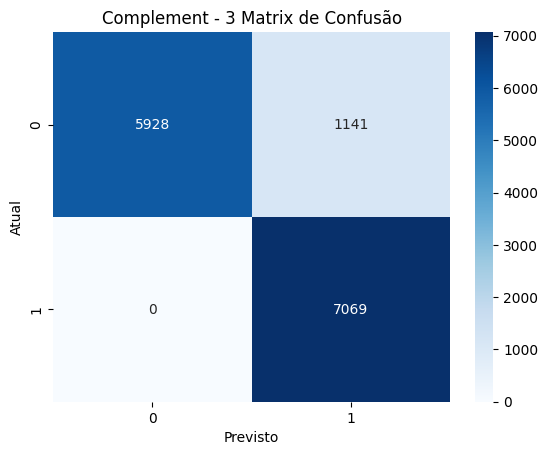

Complement - 3 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.84      0.91      7069
         Bad       0.86      1.00      0.93      7069

    accuracy                           0.92     14138
   macro avg       0.93      0.92      0.92     14138
weighted avg       0.93      0.92      0.92     14138



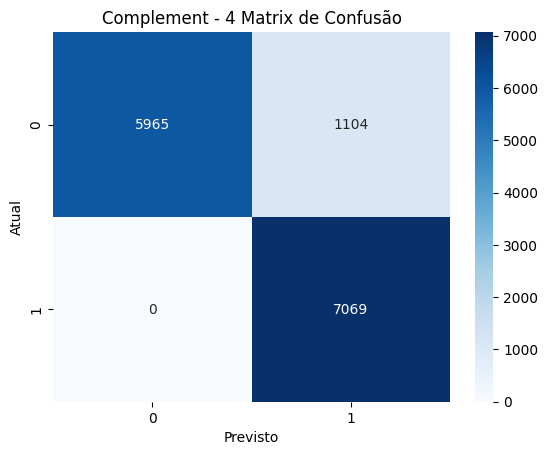

Complement - 4 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.84      0.92      7069
         Bad       0.86      1.00      0.93      7069

    accuracy                           0.92     14138
   macro avg       0.93      0.92      0.92     14138
weighted avg       0.93      0.92      0.92     14138



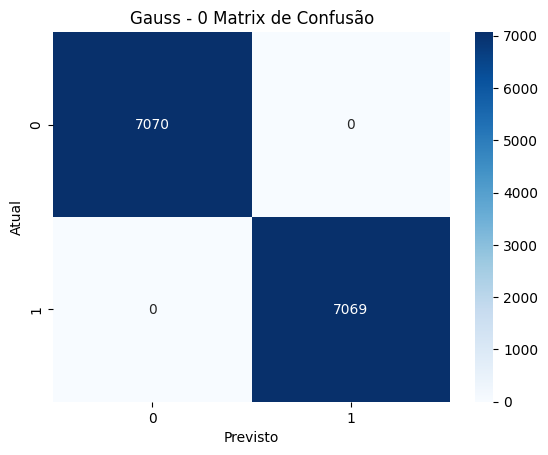

Gauss - 0 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7070
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14139
   macro avg       1.00      1.00      1.00     14139
weighted avg       1.00      1.00      1.00     14139



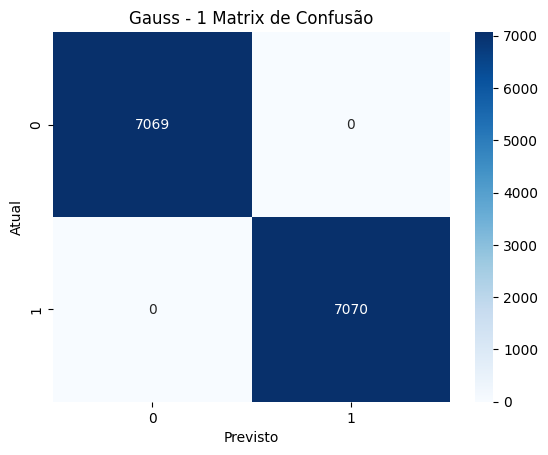

Gauss - 1 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7070

    accuracy                           1.00     14139
   macro avg       1.00      1.00      1.00     14139
weighted avg       1.00      1.00      1.00     14139



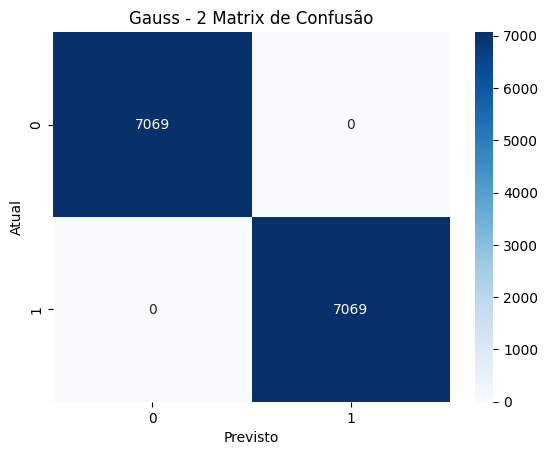

Gauss - 2 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14138
   macro avg       1.00      1.00      1.00     14138
weighted avg       1.00      1.00      1.00     14138



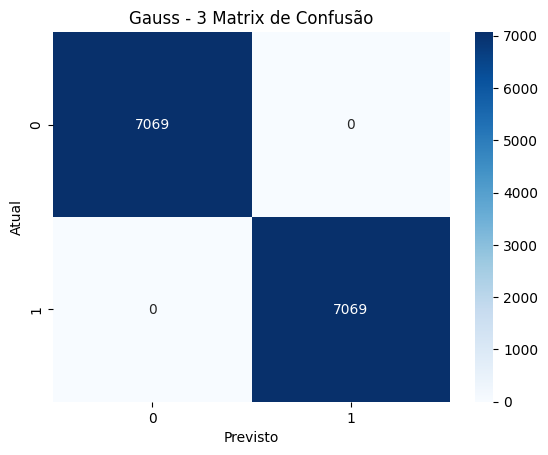

Gauss - 3 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14138
   macro avg       1.00      1.00      1.00     14138
weighted avg       1.00      1.00      1.00     14138



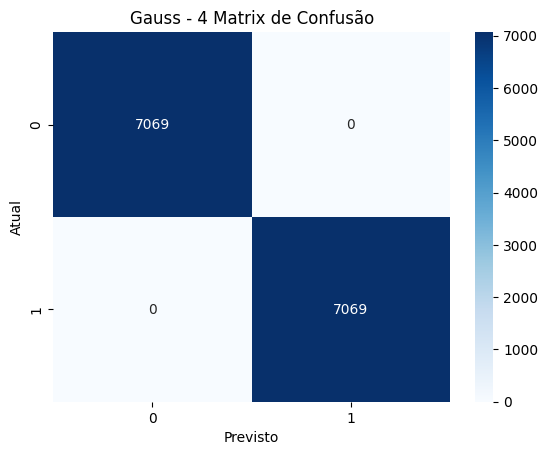

Gauss - 4 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      7069
         Bad       1.00      1.00      1.00      7069

    accuracy                           1.00     14138
   macro avg       1.00      1.00      1.00     14138
weighted avg       1.00      1.00      1.00     14138



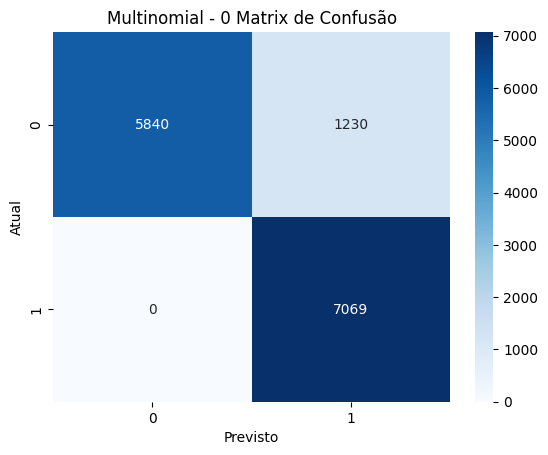

Multinomial - 0 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.83      0.90      7070
         Bad       0.85      1.00      0.92      7069

    accuracy                           0.91     14139
   macro avg       0.93      0.91      0.91     14139
weighted avg       0.93      0.91      0.91     14139



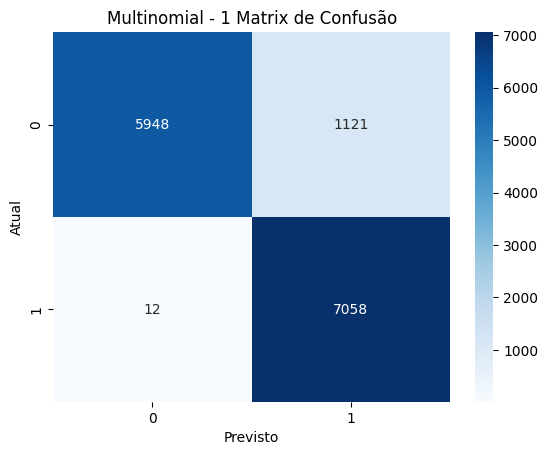

Multinomial - 1 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.84      0.91      7069
         Bad       0.86      1.00      0.93      7070

    accuracy                           0.92     14139
   macro avg       0.93      0.92      0.92     14139
weighted avg       0.93      0.92      0.92     14139



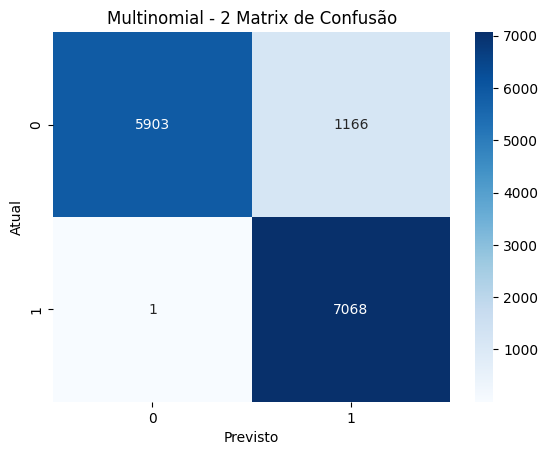

Multinomial - 2 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.84      0.91      7069
         Bad       0.86      1.00      0.92      7069

    accuracy                           0.92     14138
   macro avg       0.93      0.92      0.92     14138
weighted avg       0.93      0.92      0.92     14138



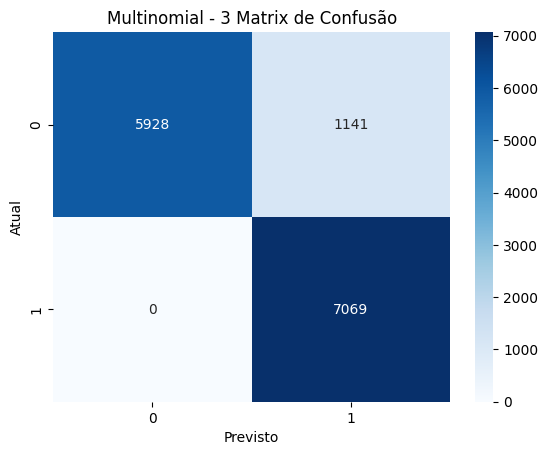

Multinomial - 3 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.84      0.91      7069
         Bad       0.86      1.00      0.93      7069

    accuracy                           0.92     14138
   macro avg       0.93      0.92      0.92     14138
weighted avg       0.93      0.92      0.92     14138



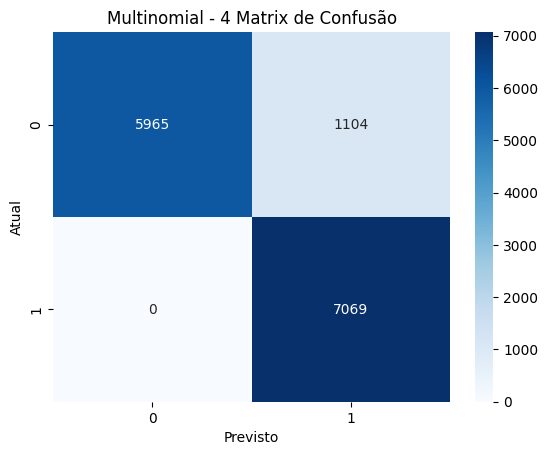

Multinomial - 4 Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.84      0.92      7069
         Bad       0.86      1.00      0.93      7069

    accuracy                           0.92     14138
   macro avg       0.93      0.92      0.92     14138
weighted avg       0.93      0.92      0.92     14138



In [37]:
df_score = pd.DataFrame()

for model, (clf, parameters) in models.items():
    for fold, (train, test) in enumerate(kf.split(X, y)):
        best = GridSearchCV(clf, parameters, cv=kf, scoring="f1", return_train_score=True)
        best.fit(X[train], y[train])
        pred = best.predict(X[test])

        cm = confusion_matrix(y[test], pred)
        
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Previsto')
        plt.ylabel('Atual')
        plt.title(f'{model} - {fold} Matrix de Confusão')
        plt.show()

        report = classification_report(y[test], pred, target_names=['Good', 'Bad'])
        print(f'{model} - {fold} Classification Report:\n{report}')

        _acc = accuracy_score(y[test], pred)
        _f1 = f1_score(y[test], pred)
        _recall = recall_score(y[test], pred)
        _precision = precision_score(y[test], pred)

        row = {'Model': model, 'accuracy': _acc, 'precision': _precision, 'recall': _recall, 'f1-score': _f1}
        df_score = pd.concat([df_score, pd.DataFrame([row])], ignore_index=True)


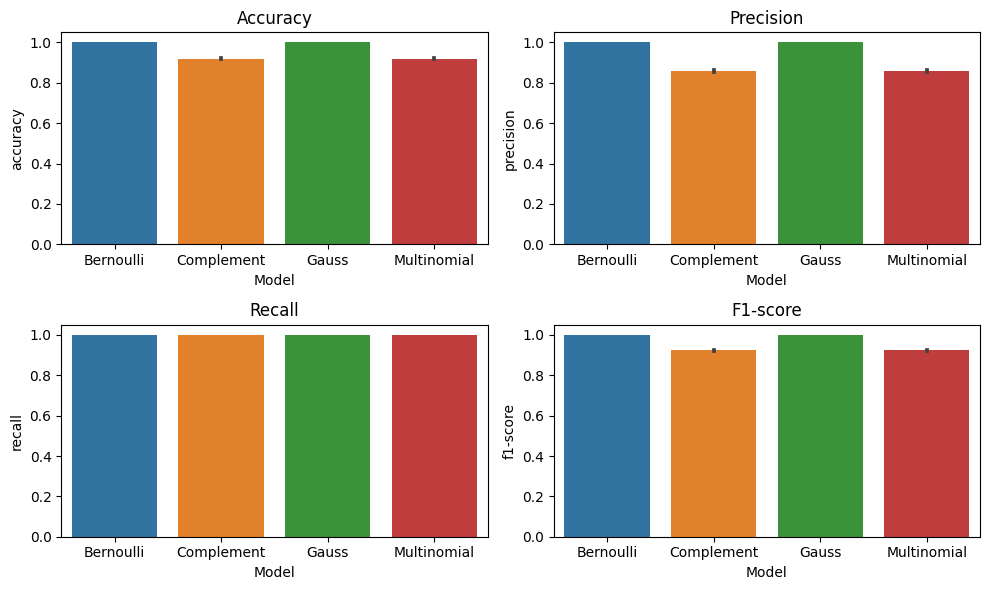

In [38]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='accuracy', data=df_score)
plt.title('Accuracy')

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='precision', data=df_score)
plt.title('Precision')

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='recall', data=df_score)
plt.title('Recall')

plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='f1-score', data=df_score)
plt.title('F1-score')

plt.tight_layout()
plt.show()

# MODELOS

# KNN

In [2]:
df = pd.read_csv('diabetes_data1.csv')
df.rename(columns = {'Age':'Idade', 'Sex':'Sexo', 'HighChol':'Nivel_Coles', 'CholCheck':'Check_coles', 'BMI':'IMC','Smoker':'Fumar_dias','HeartDiseaseorAttack':'Infarto','PhysActivity':'Atividade_física','Fruits':'Frutas','Veggies':'Vegetais','HvyAlcoholConsump':'Consumo_alccol','GenHlth':'Class_saude','MentHlth':'Saude_mental','PhysHlth':'Pratica_ativ_dias','DiffWalk':'Dificuldade_andar','Stroke':'Fumante','HighBP':'','Diabetes':'Diabetes'}, inplace = True)

In [68]:
X = df.drop(columns = ["Diabetes"]).to_numpy()
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [69]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['distance', 'uniform']}
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=3)

gridKNN.fit(X_train, y_train)

best_estimator = gridKNN.best_estimator_

y_train_pred = best_estimator.predict(X_train)

cm_train = confusion_matrix(y_train, y_train_pred)


y_test_pred = best_estimator.predict(X_test)

cm_test = confusion_matrix(y_test, y_test_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.655 total time=   0.2s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.656 total time=   0.2s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.648 total time=   0.2s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.652 total time=   0.2s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.661 total time=   0.2s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.655 total time=   0.3s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.656 total time=   0.3s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.648 total time=   0.3s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.652 total time=   0.3s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.661 total time=   0.3s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.687 total time=   0.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;

In [74]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy - Training:", accuracy_train)
print("Accuracy - Test:", accuracy_test)

Accuracy - Training: 0.7680642788434335
Accuracy - Test: 0.717450347988457


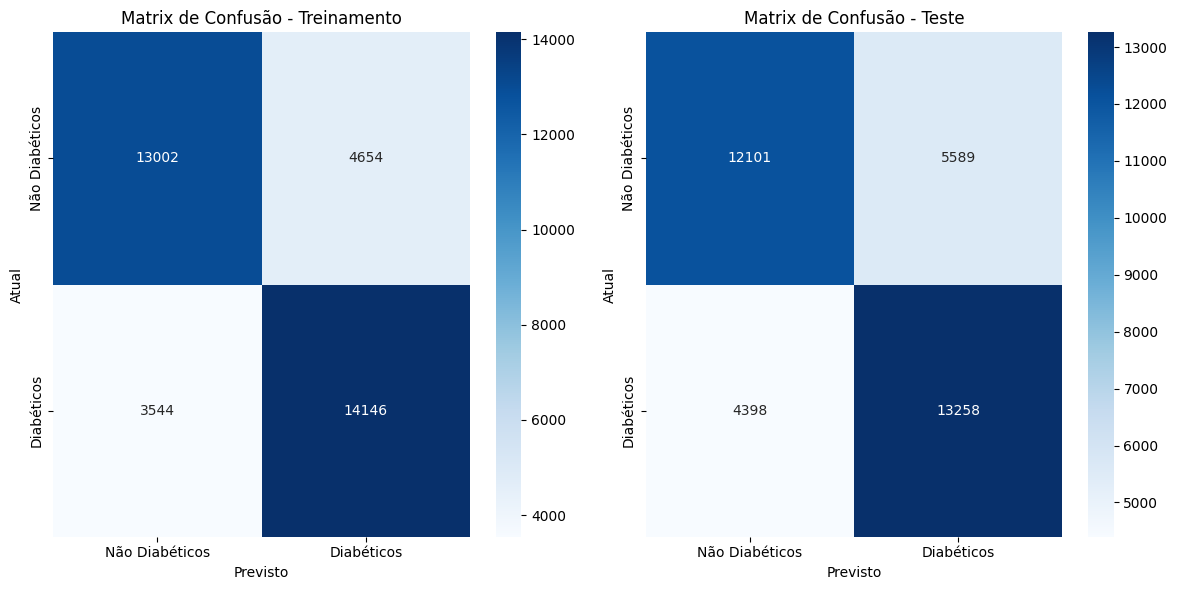

In [78]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Diabéticos', 'Diabéticos'], yticklabels=['Não Diabéticos', 'Diabéticos'])
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Treinamento')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Diabéticos', 'Diabéticos'], yticklabels=['Não Diabéticos', 'Diabéticos'])
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Teste')

plt.tight_layout()
plt.show()

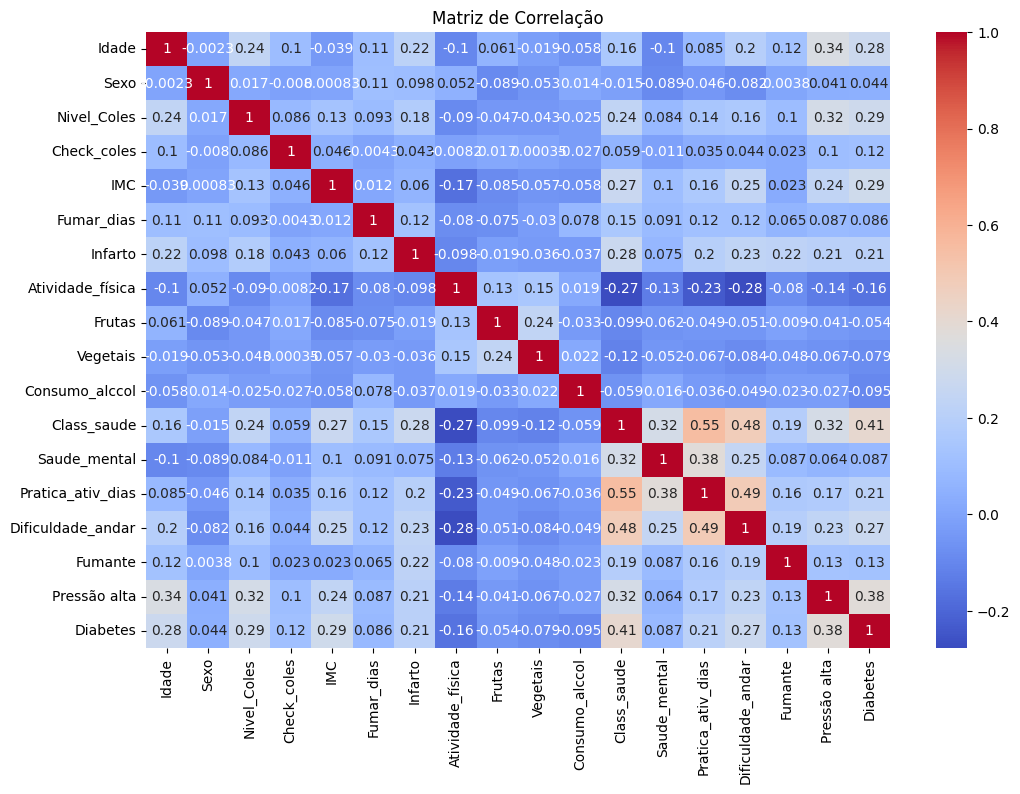

In [82]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# SVM

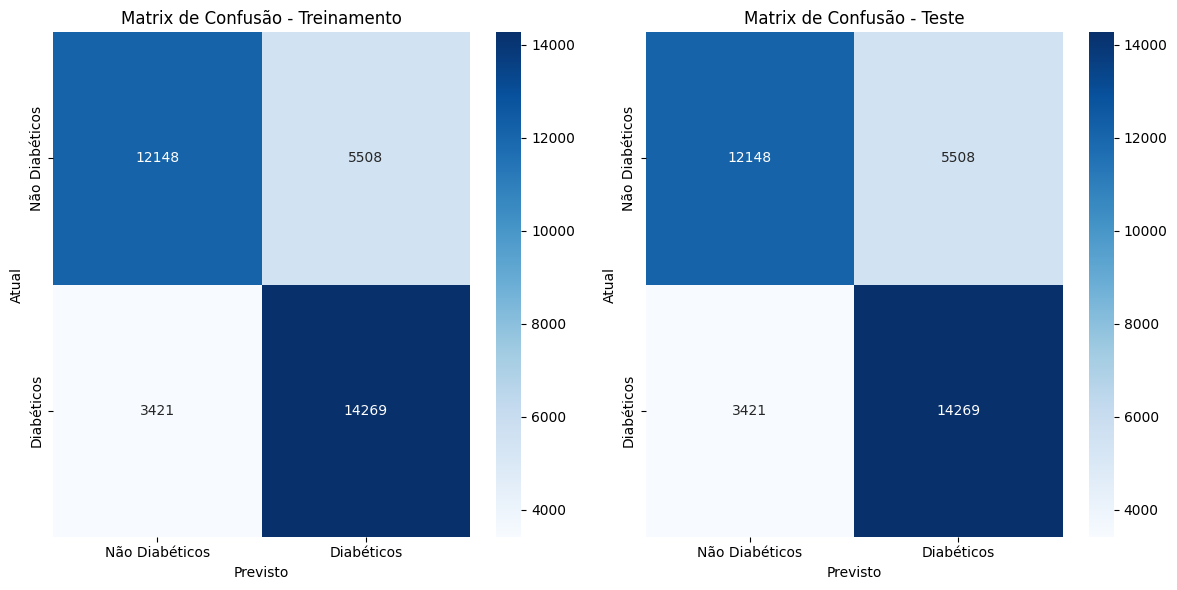

Accuracy - Training: 0.7473830136366209
Accuracy - Test: 0.7454308832682623


In [83]:
clf = SVC(kernel='rbf')

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Diabéticos', 'Diabéticos'], yticklabels=['Não Diabéticos', 'Diabéticos'])

plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Treinamento')

plt.subplot(1, 2, 2)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Diabéticos', 'Diabéticos'], yticklabels=['Não Diabéticos', 'Diabéticos'])
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Teste')

plt.tight_layout()
plt.show()

print("Accuracy - Training:", accuracy_train)
print("Accuracy - Test:", accuracy_test)


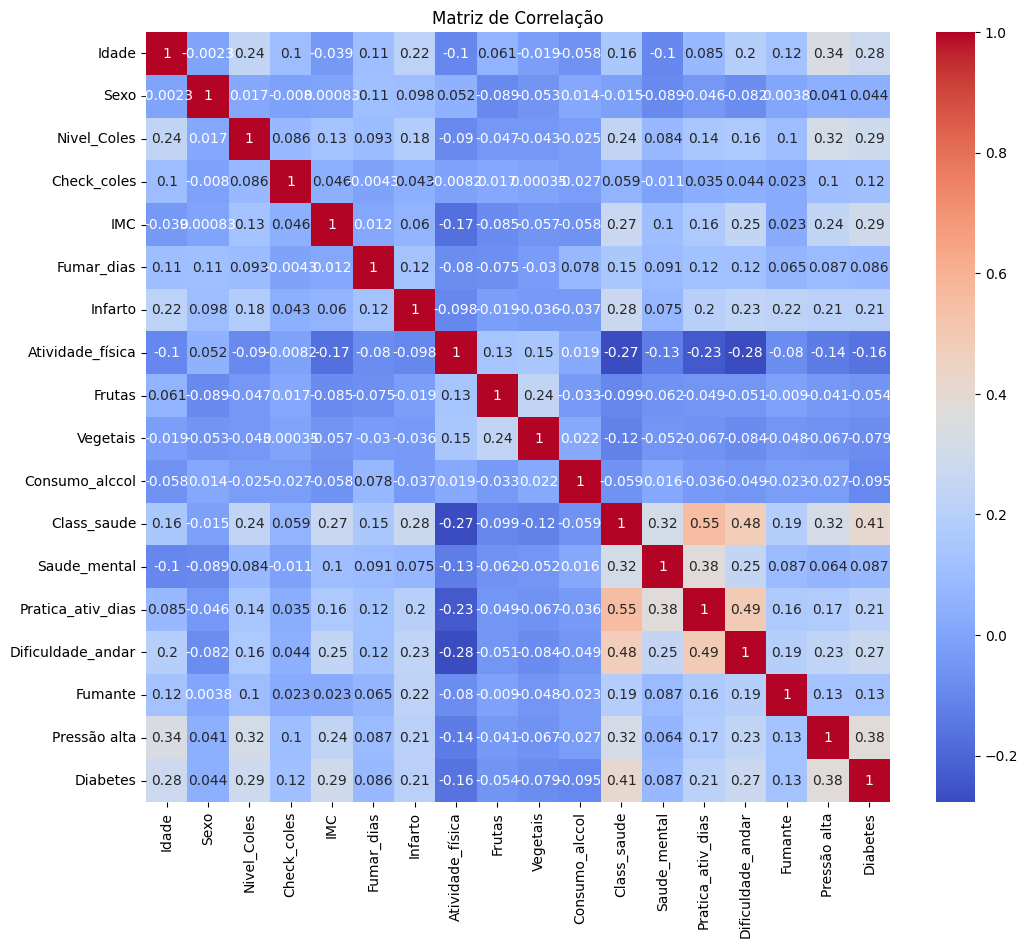

In [84]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


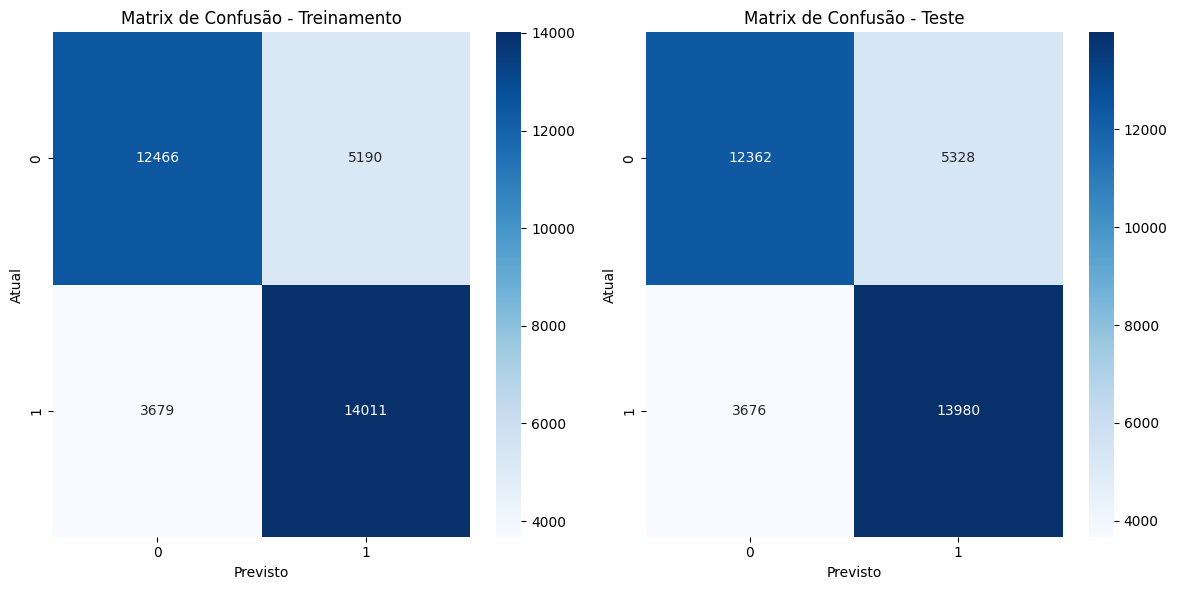

Accuracy - Training: 0.7490805183047586
Accuracy - Test: 0.7452611328014486


In [85]:
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Treinamento')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.title('Matrix de Confusão - Teste')

plt.tight_layout()
plt.show()

print("Accuracy - Training:", accuracy_train)
print("Accuracy - Test:", accuracy_test)

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


# Naive bayes

In [88]:
gauss = GaussianNB()
kf = StratifiedKFold()

In [94]:
gauss = GaussianNB()

confusion_matrices = []

for fold, (train, test) in enumerate(kf.split(X, y)):
    gauss.fit(X[train], y[train])
    y_pred = gauss.predict(X[test])

    cm = confusion_matrix(y[test], y_pred)
    confusion_matrices.append(cm)

    accuray = accuracy_score(y[test], y_pred)
    print("Accuracy:", accuray)

    f1 = f1_score(y[test], y_pred)
    print("F1 Score:", f1)




Accuracy: 0.6926232406818021
F1 Score: 0.0
Accuracy: 0.6917037980055166
F1 Score: 0.0
Accuracy: 0.7201867307964351
F1 Score: 0.7168622960206127
Accuracy: 0.6645918800396096
F1 Score: 0.7985042916631256
Accuracy: 0.680506436553968
F1 Score: 0.80988257081527


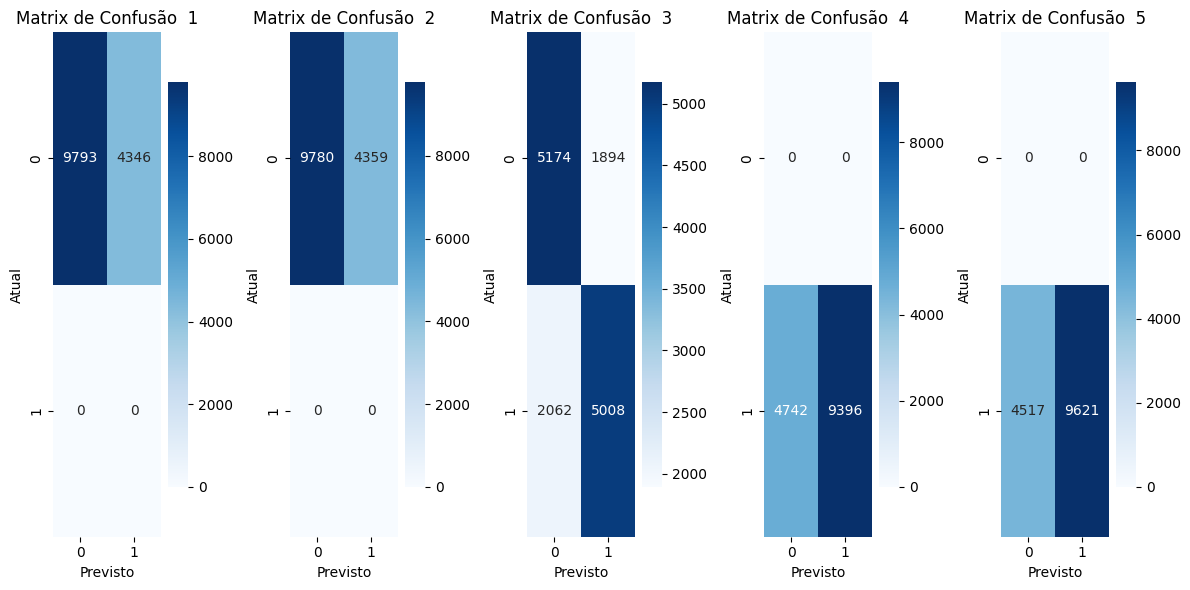

In [136]:
plt.figure(figsize=(12, 6))
for i, cm in enumerate(confusion_matrices):
    plt.subplot(1, len(confusion_matrices), i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Previsto')
    plt.ylabel('Atual')
    plt.title(f'Matrix de Confusão  {i+1}')
plt.tight_layout()
plt.show()